In [2]:
from tdc.single_pred import Tox
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tdc.utils import retrieve_label_name_list

In [3]:
# First, check available toxicity endpoints
label_names = retrieve_label_name_list('Tox21')
print("Available toxicity endpoints:")
print(label_names)
# Get all endpoints
all_data = []
for label in retrieve_label_name_list('Tox21'):
    data = Tox(name='Tox21', label_name=label)
    df = data.get_data()
    df['assay'] = label  # Add assay name as column
    all_data.append(df)

# Combine all assays
combined_df = pd.concat(all_data)

Found local copy...
Loading...


Available toxicity endpoints:
['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']


Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")



In [5]:
# Check dataset shape
print(f"Dataset Shape: {combined_df.shape}")

Dataset Shape: (77946, 4)


In [6]:
print(combined_df.dtypes) 

Drug_ID     object
Drug        object
Y          float64
assay       object
dtype: object


In [7]:
# Display basic info
print("\nDataset Info:")
print(combined_df.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 77946 entries, 0 to 6773
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Drug_ID  77946 non-null  object 
 1   Drug     77946 non-null  object 
 2   Y        77946 non-null  float64
 3   assay    77946 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None


In [8]:
# Display first few rows
print("\nFirst Few Rows:")
print(combined_df.head())


First Few Rows:
    Drug_ID                                  Drug    Y  assay
0   TOX3021          CCOc1ccc2nc(S(N)(=O)=O)sc2c1  0.0  NR-AR
1   TOX3020             CCN1C(=O)NC(c2ccccc2)C1=O  0.0  NR-AR
2   TOX3027       CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C  0.0  NR-AR
3  TOX20800             CC(O)(P(=O)(O)O)P(=O)(O)O  0.0  NR-AR
4   TOX5110  CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C  0.0  NR-AR


In [9]:
# Check for duplicate rows
print(f"\nDuplicate Rows: {combined_df.duplicated().sum()}")


Duplicate Rows: 0


In [10]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 Y
count  6774.000000
mean      0.062445
std       0.241979
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [11]:
# Count missing values
missing_values = combined_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


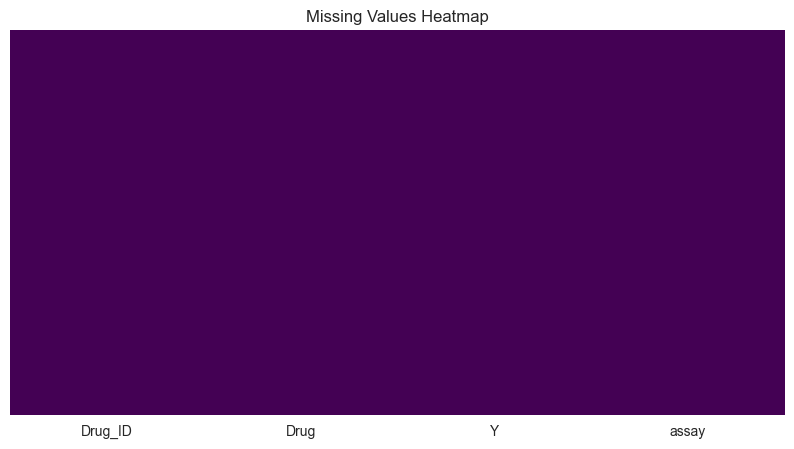

In [12]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(combined_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

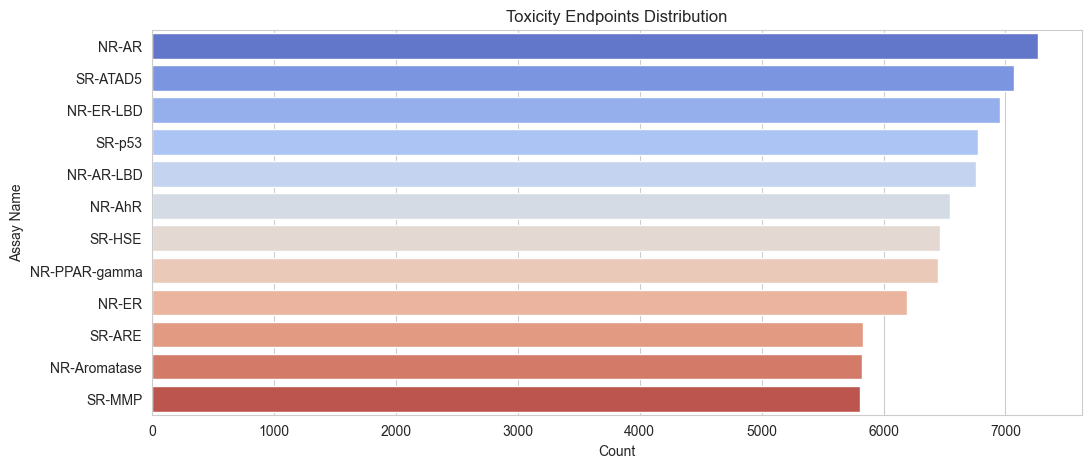

In [13]:
# Class distribution of toxicity labels
plt.figure(figsize=(12, 5))
sns.countplot(y="assay", data=combined_df, order=combined_df["assay"].value_counts().index, palette="coolwarm")
plt.title("Toxicity Endpoints Distribution")
plt.xlabel("Count")
plt.ylabel("Assay Name")
plt.show()

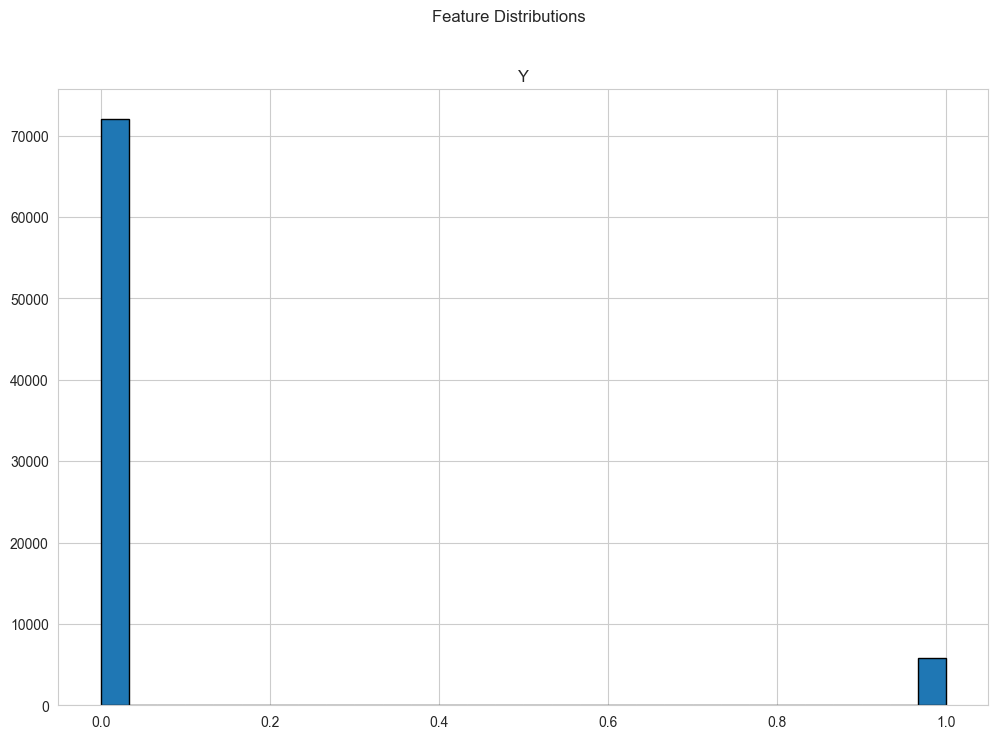

In [14]:
# Feature distribution (histograms)
combined_df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

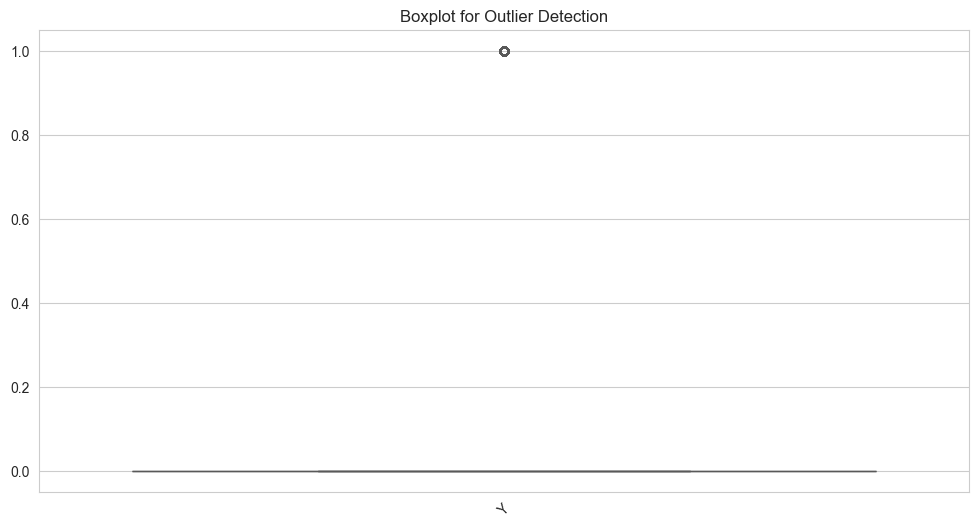

EDA Completed Successfully!


In [15]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df.select_dtypes(include=['float64', 'int64']), palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Pairplot to visualize feature relationships
# Uncomment for small datasets (can be slow for large data)
# sns.pairplot(combined_df, hue="assay", diag_kind="kde", palette="husl")
# plt.show()

print("EDA Completed Successfully!")

In [16]:
# combined_df.to_parquet('../data/All/tox21_combined_data.parquet', index=False)
# print("Dataset downloaded and saved as 'tox21_dataset.parquet'")

In [17]:
from rdkit import Chem

# Function to count atoms in SMILES representation
def count_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to molecule
    if mol is None:
        return None, None, None  # Handle invalid SMILES
    num_c = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'C')
    num_o = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')
    num_n = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')
    return num_c, num_o, num_n

# Apply function to create new columns
combined_df[['num_C', 'num_O', 'num_N']] = combined_df['Drug'].apply(
    lambda x: pd.Series(count_atoms(x))
)

# View the updated dataset
print(combined_df.head())


[12:23:31] WARNING: not removing hydrogen atom without neighbors
[12:23:34] Explicit valence for atom # 3 Al, 6, is greater than permitted
[12:23:34] Explicit valence for atom # 4 Al, 6, is greater than permitted
[12:23:35] Explicit valence for atom # 4 Al, 6, is greater than permitted
[12:23:37] Explicit valence for atom # 9 Al, 6, is greater than permitted
[12:23:37] Explicit valence for atom # 5 Al, 6, is greater than permitted
[12:23:38] Explicit valence for atom # 16 Al, 6, is greater than permitted
[12:23:39] Explicit valence for atom # 20 Al, 6, is greater than permitted
[12:23:41] WARNING: not removing hydrogen atom without neighbors
[12:23:43] Explicit valence for atom # 3 Al, 6, is greater than permitted
[12:23:43] Explicit valence for atom # 4 Al, 6, is greater than permitted
[12:23:45] Explicit valence for atom # 4 Al, 6, is greater than permitted
[12:23:46] Explicit valence for atom # 9 Al, 6, is greater than permitted
[12:23:46] Explicit valence for atom # 5 Al, 6, is gre

    Drug_ID                                  Drug    Y  assay  num_C  num_O  \
0   TOX3021          CCOc1ccc2nc(S(N)(=O)=O)sc2c1  0.0  NR-AR    9.0    3.0   
1   TOX3020             CCN1C(=O)NC(c2ccccc2)C1=O  0.0  NR-AR   11.0    2.0   
2   TOX3027       CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C  0.0  NR-AR   17.0    1.0   
3  TOX20800             CC(O)(P(=O)(O)O)P(=O)(O)O  0.0  NR-AR    2.0    7.0   
4   TOX5110  CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C  0.0  NR-AR   16.0    4.0   

   num_N  
0    2.0  
1    2.0  
2    2.0  
3    0.0  
4    0.0  


In [20]:
from eosce.models import list_models

# List all available models
models = list_models()
print(models)


ImportError: cannot import name 'list_models' from 'eosce.models' (C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\eosce\models.py)

Available toxicity endpoints:
['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']


Found local copy...
Loading...
Done!


    Drug_ID                                  Drug    Y
0   TOX3021          CCOc1ccc2nc(S(N)(=O)=O)sc2c1  0.0
1   TOX3020             CCN1C(=O)NC(c2ccccc2)C1=O  0.0
2   TOX3027       CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C  0.0
3  TOX20800             CC(O)(P(=O)(O)O)P(=O)(O)O  0.0
4   TOX5110  CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C  0.0


Dataset Shape: (7265, 3)


Drug_ID     object
Drug        object
Y          float64
dtype: object



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7265 entries, 0 to 7264
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Drug_ID  7265 non-null   object 
 1   Drug     7265 non-null   object 
 2   Y        7265 non-null   float64
dtypes: float64(1), object(2)
memory usage: 170.4+ KB
None



Duplicate Rows: 0



Summary Statistics:
                 Y
count  7265.000000
mean      0.042533
std       0.201815
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000



Missing Values:
Series([], dtype: int64)


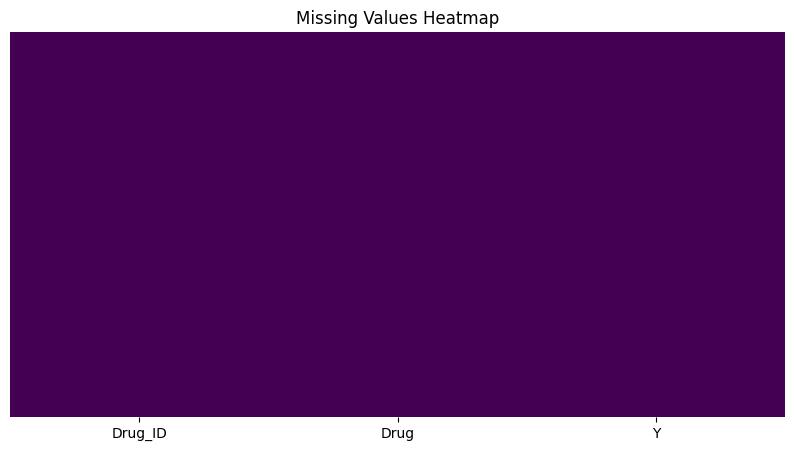

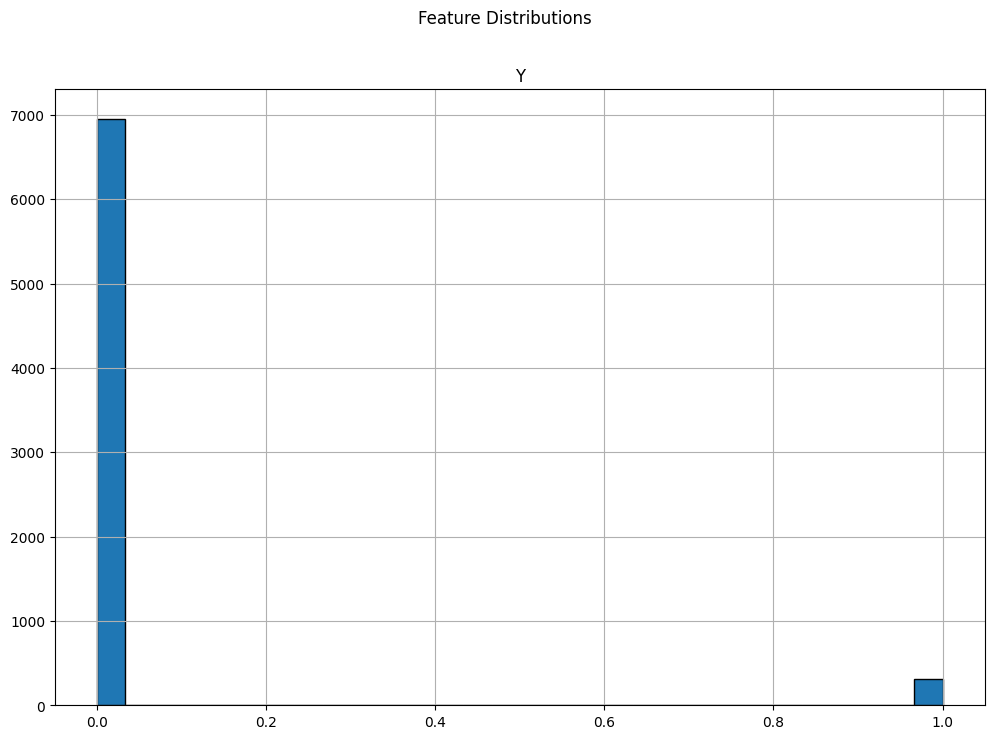

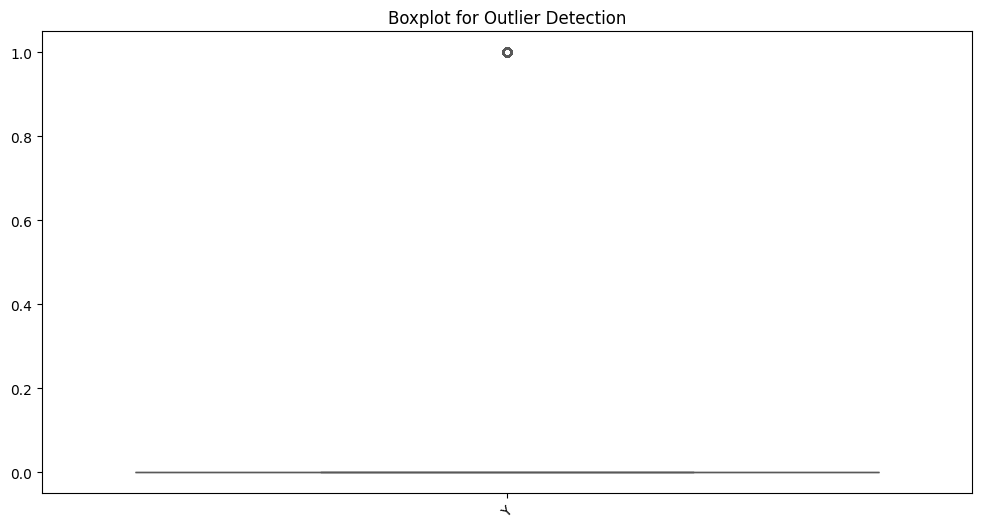

EDA Completed Successfully!


Text(0.5, 1.0, 'Class Distribution Across Splits')

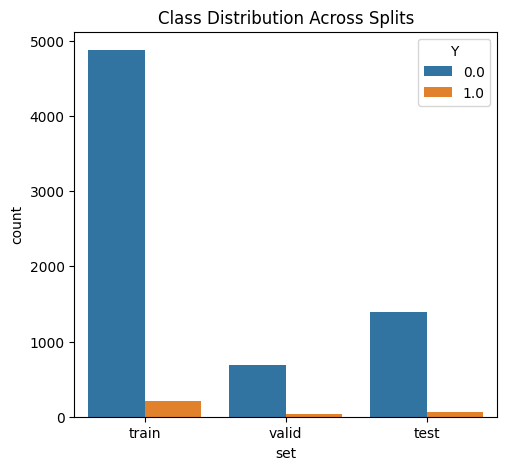